Pranav Kumar,
prn 1032200232,
FY BTECH

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree


In [37]:
# Load the dataset
data = pd.read_csv("winequality-red.csv")

In [38]:
print("Dataset shape:", data.shape)
print("\nDataset columns:", data.columns)
print("\nDataset description:\n", data.describe())

Dataset shape: (1599, 12)

Dataset columns: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Dataset description:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      

In [39]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


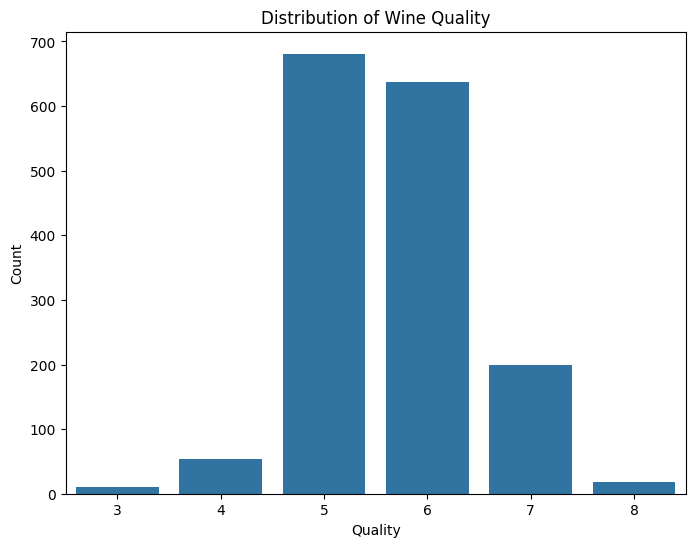

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x="quality", data=data)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality")
plt.show()

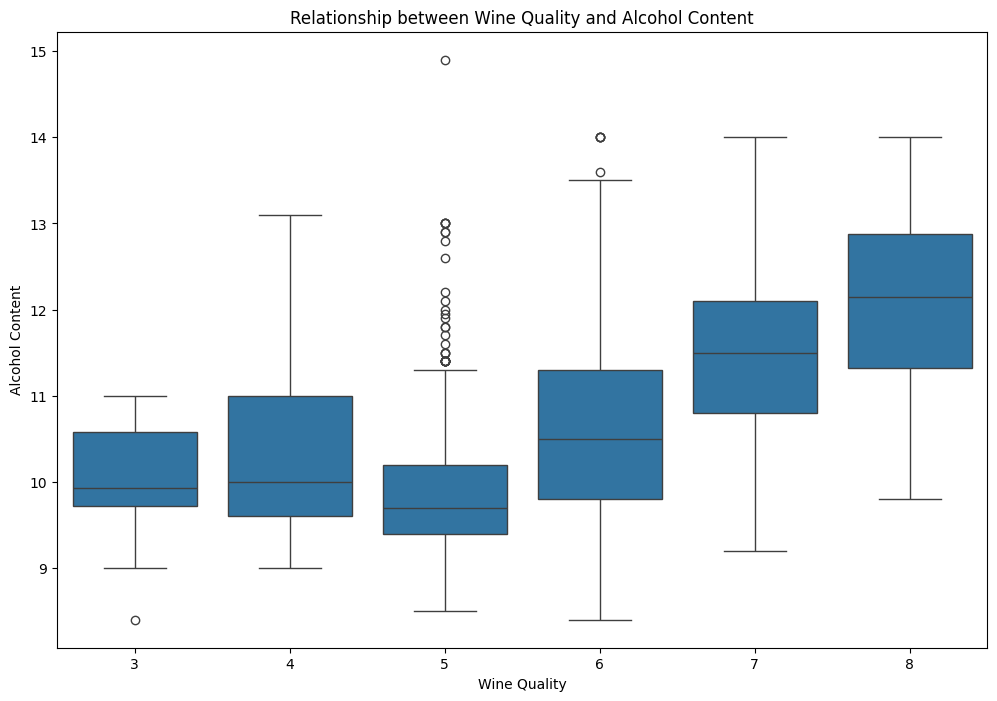

In [41]:
# Plotting relationship between 'quality' and 'alcohol'
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=data)
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol Content")
plt.title("Relationship between Wine Quality and Alcohol Content")
plt.show()

In [42]:
# Selecting relevant features
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
X = data[features]
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Accuracy: 0.60625

Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  3  4  2  0]
 [ 1  2 90 28  9  0]
 [ 0  4 40 74 13  1]
 [ 0  0  4  8 29  1]
 [ 0  0  1  1  3  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.14      0.10      0.12        10
           5       0.65      0.69      0.67       130
           6       0.64      0.56      0.60       132
           7       0.52      0.69      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.33      0.34      0.33       320
weighted avg       0.60      0.61      0.60       320



In [44]:
print(clf)

DecisionTreeClassifier(random_state=42)


In [45]:
print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  
0                 11.0                  34.0   0.9978  3.51       0.56  
1                 25.0                  67.0   0.9968  3.20       0.68  
2                 15.0                  54.0   0.9970  3.26       0.65  
3                 17.0                  60.0   0.9980  3.16       0.58  
4                 11.0                  34.0   0.9978  3.51       0.56  


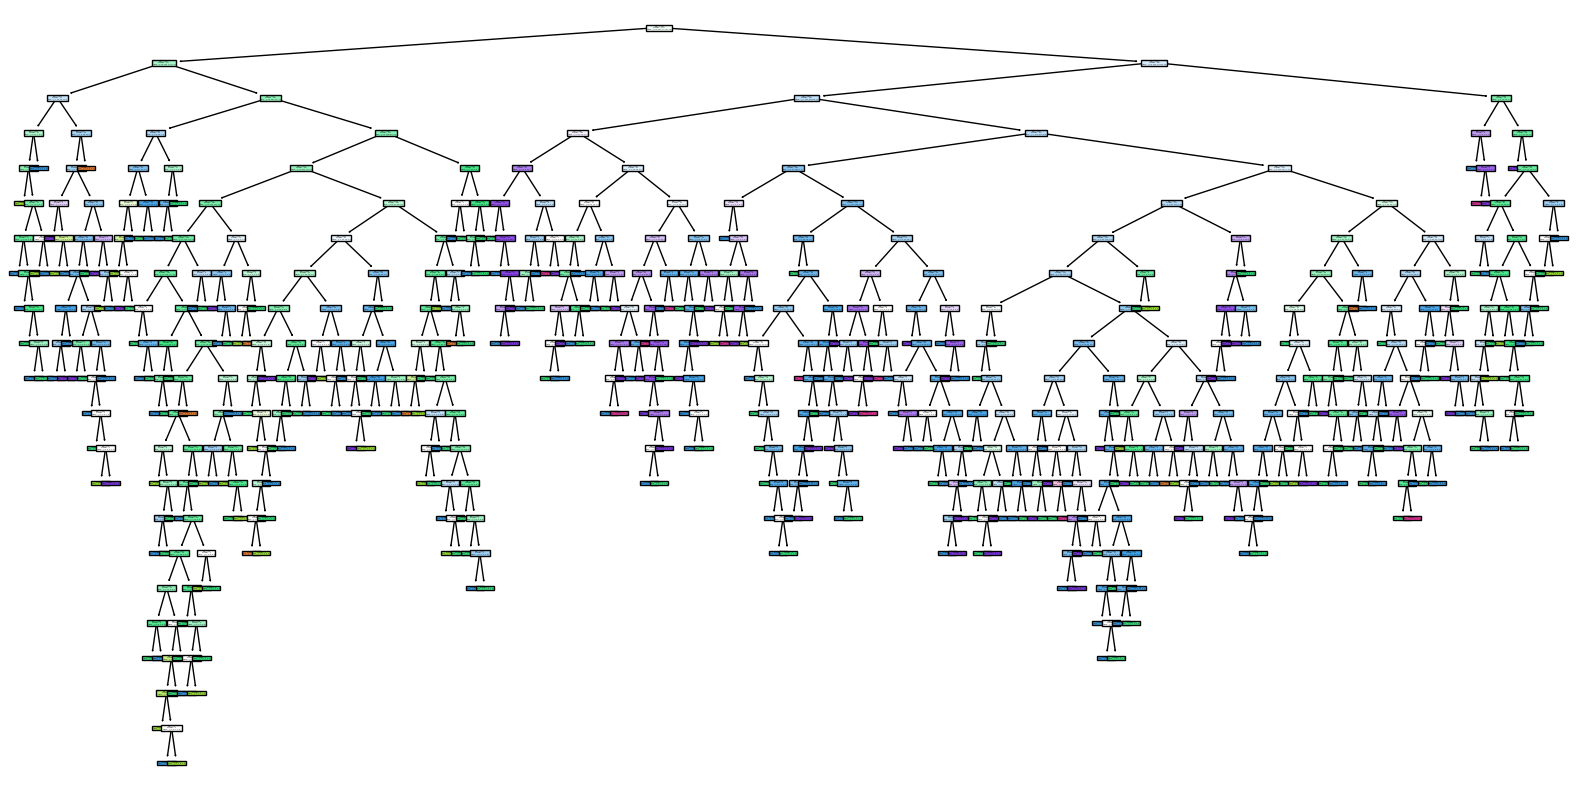

In [48]:
# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [49]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
                 Feature  Importance
9             sulphates    0.137106
7               density    0.134405
6  total sulfur dioxide    0.113987
4             chlorides    0.103393
0         fixed acidity    0.101443
3        residual sugar    0.091543
5   free sulfur dioxide    0.090052
1      volatile acidity    0.089410
2           citric acid    0.079518
8                    pH    0.059146
